## Assignment 2.2
## Scikit Learn
Scikit Learn is an open source, simple and efficient tools for data mining and data analysis. It is built on NumPy, SciPy, and matplotlib and is accessible to everybody, and reusable in various contexts.

[Scikit-Learn Official](http://scikit-learn.org/stable/)

### Linear Regression

Linear regression is about finding the approximation of a linear model used to describe the relationship between two or more variables. 
In simple linear regression, there are two variables: a dependent variable and an independent variable (target variable). The main point in the linear regression is that our dependent value should be continuous
and cannot be a discrete value. However, the independent variable(s) can be measured on either a categorical or continuous measurement scale.
When more than one independent variable is present, then it is called multiple linear regression.

We have already carried out Linear Regression using Matrix multiplication in Project of Module 1 where we used the Normal Equation for Linear Regression $Theta = (X^TX)^{-1}X^T$. Complexity of this computation will increase as the number of features increases. It gets very slow when number of features grow large. Thus we'll use other numeric techniques such as least square methods or Optimisation technique to miniize the error.

The core idea is to obtain a line or a plane that best fits the data. The best fit line or plane is the one for which total prediction error (all data points) are as small as possible.  Coefficients of the equation of this line are what we want to deduce. 

$ y = \Theta_0 + \Theta_1 * x_1 +\Theta_2 * x_2 +... $ 

Notice all the parameters are linear to the weights, hence linear regression.

![Linear Regression](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/438px-Linear_regression.svg.png)
Error is the distance between the point to the regression line or plane.
We minimize this error and estimate the optimized value for theta using least square methods or Optimisation technique such as gradient descent.


*Generally, there are two applications for linear regression.*
1. Identify the strength of the effect that the independent variables have on a dependent variable.
For example, does nearness to a road or having a swiming pool or school nearby have any effect
on cost of the house? 

2. To predict the impact of changes. That is, to understand how the dependent variable changes when we change the independent variables. 
For example, a multiple linear regression can tell you how much that housing prices increase or decrease for every additional square foot of the house area, holding other factors constant.

3. In multiple linear regression, you can examine which variables are significant predictors of the outcome variable.

[Linear Regression WIKI](https://en.wikipedia.org/wiki/Linear_regression)

Data has been imported for you.
To know more about datasets available in sklearn, visit this [link](http://scikit-learn.org/stable/datasets/index.html).

### Exercise 1

Import necessary libraries for
- [Linear Machine Learning Model](http://scikit-learn.org/stable/modules/linear_model.html)
- [Accuracy Metrics](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)
    - Use Mean Squared Error
- Other Necessary Packages such as pandas, numpy and pyplot.

In [52]:
# YOUR CODE HERE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model

In [ ]:
#### INTENTIONALLY LEFT BLANK####

We will use Fuel Consumption rating dataset for this problem. This Dataset provide model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.
[Data Source](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

### Exercise 2

Import the file  ***CO2_1995.csv*** as a dataframe

A List of Header names has been provided to you as "head"

Analyze the dataset and perform any data cleaning that seems to be necessary.

In [25]:
head = [ "MODELYEAR", "MAKE", "MODEL","VEHICLECLASS", "ENGINESIZE", "CYLINDERS", "TRANSMISSION", "FUELTYPE","CITY_FUELCONSUMPTION", "HWY_FUELCONSUMPTION", "COMB_FUELCONSUMPTION1","COMB_FUELCONSUMPTION2", "CO2EMISSIONS"]
# YOUR CODE HERE

fuel_df = pd.read_csv('CO2_1995.csv')

In [5]:
fuel_df.head()

,MODEL,MAKE,MODEL.1,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2 EMISSIONS
0,YEAR,NaN,# = high output engine,NaN,(L),NaN,NaN,TYPE,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),(g/km)
1,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,A4,X,10.2,7.0,8.8,32,202
2,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,M5,X,9.6,7.0,8.4,34,193
3,1995,ACURA,INTEGRA GS-R,SUBCOMPACT,1.8,4.0,M5,Z,9.4,7.0,8.3,34,191
4,1995,ACURA,LEGEND,COMPACT,3.2,6.0,A4,Z,12.6,8.9,10.9,26,251


In [26]:
fuel_df.columns

Index(['MODEL', 'MAKE', 'MODEL.1', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'CO2 EMISSIONS '],
      dtype='object')

In [27]:
# Changing the column names as provided above
fuel_df.columns = head
# Also dropping the first row as it is not necessary
fuel_df = fuel_df.drop(fuel_df.index[0])

fuel_df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,CITY_FUELCONSUMPTION,HWY_FUELCONSUMPTION,COMB_FUELCONSUMPTION1,COMB_FUELCONSUMPTION2,CO2EMISSIONS
1,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,A4,X,10.2,7.0,8.8,32,202
2,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,M5,X,9.6,7.0,8.4,34,193
3,1995,ACURA,INTEGRA GS-R,SUBCOMPACT,1.8,4.0,M5,Z,9.4,7.0,8.3,34,191
4,1995,ACURA,LEGEND,COMPACT,3.2,6.0,A4,Z,12.6,8.9,10.9,26,251
5,1995,ACURA,LEGEND COUPE,COMPACT,3.2,6.0,A4,Z,13.0,9.3,11.3,25,260


In [28]:
# Trying one-hot encoding for columns with fewer categories

from sklearn.preprocessing import LabelEncoder

for column in fuel_df.columns:
    label_encoder = LabelEncoder()
    number_of_labels = max(label_encoder.fit_transform(fuel_df[column]))
    print(f'{column}: {number_of_labels}')


MODELYEAR: 4
MAKE: 40
MODEL: 761
VEHICLECLASS: 13
ENGINESIZE: 46
CYLINDERS: 7
TRANSMISSION: 8
FUELTYPE: 4
CITY_FUELCONSUMPTION: 163
HWY_FUELCONSUMPTION: 113
COMB_FUELCONSUMPTION1: 140
COMB_FUELCONSUMPTION2: 42
CO2EMISSIONS: 274


In [29]:
# We can see that we have fewer categories for FUELTYPE and TRANSMISSION (which are not in numeric form)

# So, we use one-hot encoding for these two columns (just giving it a try)
le_fueltype = LabelEncoder()
fuel_df['FUELTYPE'] = le_fueltype.fit_transform(fuel_df['FUELTYPE'])

le_transmission = LabelEncoder()
fuel_df['TRANSMISSION'] = le_transmission.fit_transform(fuel_df['TRANSMISSION'])

In [31]:
# New dataframe with two one-hot encoded columns
fuel_df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,CITY_FUELCONSUMPTION,HWY_FUELCONSUMPTION,COMB_FUELCONSUMPTION1,COMB_FUELCONSUMPTION2,CO2EMISSIONS
1,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,1,3,10.2,7.0,8.8,32,202
2,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,7,3,9.6,7.0,8.4,34,193
3,1995,ACURA,INTEGRA GS-R,SUBCOMPACT,1.8,4.0,7,4,9.4,7.0,8.3,34,191
4,1995,ACURA,LEGEND,COMPACT,3.2,6.0,1,4,12.6,8.9,10.9,26,251
5,1995,ACURA,LEGEND COUPE,COMPACT,3.2,6.0,1,4,13.0,9.3,11.3,25,260
6,1995,ACURA,LEGEND COUPE,COMPACT,3.2,6.0,8,4,13.4,8.4,11.2,25,258
7,1995,ACURA,NSX,TWO-SEATER,3.0,6.0,1,4,13.5,9.2,11.6,24,267
8,1995,ACURA,NSX,TWO-SEATER,3.0,6.0,7,4,12.9,9.0,11.1,25,255
9,1995,ALFA ROMEO,164 LS,COMPACT,3.0,6.0,1,4,15.7,10.0,13.1,22,301
10,1995,ALFA ROMEO,164 LS,COMPACT,3.0,6.0,7,4,13.8,9.0,11.6,24,267


In [ ]:
#### INTENTIONALLY LEFT BLANK ####

## Analyze the dataset and Implement Linear Regression

Before attempting to fit a linear model to observed data, a modeler should first determine whether or not there is a relationship between the variables of interest. This does not necessarily imply that one variable causes the other, but that there is some significant correlation between the two variables. 

A scatterplot can be a helpful tool in determining the strength of the relationship between two variables. If there appears to be no association between the proposed explanatory and dependent variables (i.e., the scatterplot does not indicate any increasing or decreasing trends), then fitting a linear regression model to the data probably will not provide a useful model. 

A valuable numerical measure of association between two variables is the correlation coefficient, which is a value between -1 and 1 indicating the strength of the association of the observed data for the two variables. We can use correlation functions for this purpose.


### Exercise 3

Plot Histogram to check the distribution of the data

In [71]:
%matplotlib inline
variables = ['CYLINDERS','ENGINESIZE',"CITY_FUELCONSUMPTION"]
target = 'CO2EMISSIONS'

variables.append(target)
X = None
# YOUR CODE HERE
X = fuel_df[variables]

In [72]:
X.dtypes

CYLINDERS               float64
ENGINESIZE               object
CITY_FUELCONSUMPTION     object
CO2EMISSIONS             object
dtype: object

In [76]:
# Convert columns to numeric for histogram
X.loc[:, variables].apply(pd.to_numeric)

,CYLINDERS,ENGINESIZE,CITY_FUELCONSUMPTION,CO2EMISSIONS
1,4.0,1.8,10.2,202
2,4.0,1.8,9.6,193
3,4.0,1.8,9.4,191
4,6.0,3.2,12.6,251
5,6.0,3.2,13.0,260
6,6.0,3.2,13.4,258
7,6.0,3.0,13.5,267
8,6.0,3.0,12.9,255
9,6.0,3.0,15.7,301
10,6.0,3.0,13.8,267


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdb9fc3be80>,
      dtype=object)

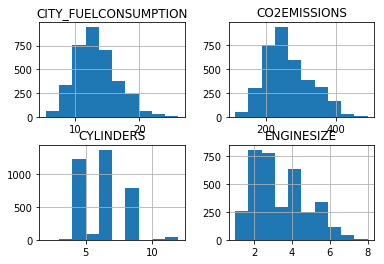

In [77]:
X.hist()

In [ ]:
#### INTENTIONALLY LEFT BLANK ####

### Exercise 4
Assign the target values to y.

In [88]:
y = None
# YOUR CODE HERE
Y = pd.DataFrame(fuel_df['CO2EMISSIONS'])
fuel_df = fuel_df.drop('CO2EMISSIONS', axis=1)

In [89]:
Y.head()

,CO2EMISSIONS
1,202
2,193
3,191
4,251
5,260


In [ ]:
#### INTENTIONALLY LEFT BLANK ####

Let's now plot a scatter plot to check if the chosen variables can be used for linear relationship.

In [92]:
variables = variables.pop('CO2EMISSIONS')
nv = len(variables)
s = np.ceil(np.sqrt(nv-1)).astype(int)
for i in range(nv):
    plt.subplot(s,s,i+1)
    plt.subplots_adjust(wspace = 0.5,hspace=0.5)
    plt.scatter(fuel_df[variables[i]], fuel_df[target],  color='blue')
    plt.xlabel(variables[i])
    plt.ylabel(target)
plt.show()

TypeError: 'str' object cannot be interpreted as an integer

### Split the data into train, validation and test set

Let us now [split the data into a training and testing set](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) which will allow you to produce two mutually exclusive sets. We will use train_test_split twice to split data into training, validation and testing set. Training set would be used for training the model, validation set would be used for tuning the hyperparameters while testing set will be used to evaluate the accuracy and see if your model generalizes well. This means whether the model is able to perform well on data it has not seen before. This is a way to see if the model is overfitting.

Overfitting is when a model is trained too well on the training data. You want to avoid overfitting, as this would mean that the model mostly just memorized the training data. This would account for a large accuracy with the training data but a low accuracy in the testing data. 

<b>Note:</b> We will be using the same random_seed in all our model.

In [ ]:
# Run this cell to set a uniform random_seed
random_seed = 7

### Exercise 5
Split our data to train and test with the test size of 0.25 and random_state=random_seed.

In [ ]:
from sklearn.model_selection import train_test_split
Train_set = None
Test_set = None
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
#### INTENTIONALLY LEFT BLANK ####

### Exercise 6
1. Create Linear Regression object with fit_intercept set to True.
2. Train the model using the training sets.
3. Save coefficients in Theta.

In [ ]:
Theta = None
# YOUR CODE HERE
raise NotImplementedError()
print(Theta[0])
print(Theta[1])
print(Theta[2])
print(intercept)

In [ ]:
#### INTENTIONALLY LEFT BLANK ####

Let's tune the hyperparamters in the validation set.

### Exercise 7
Find the parameters currently used by our Linear Regression model.

In [ ]:
lr_params = None
# YOUR CODE HERE
raise NotImplementedError()
print(lr_params)

In [ ]:
#### INTENTIONALLY LEFT BLANK ####

As we have only 4 parameters and all the parameters seems ok so, let's test our linear regression model on test set.

### Exercise 8
Predict the values of the test set in predict_Y.

In [ ]:
predict_Y = None
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
#### INTENTIONALLY LEFT BLANK ####

### Residual Analysis
Randomness and unpredictability are the two main components of a regression model.

Prediction = Deterministic + Stochastic

Deterministic part is easily covered by the predictor variable in the model. Stochastic part reveals the fact that the expected and observed value is unpredictable. There will always be some information that are missed to cover. This difference in information can be obtained as the residual information. Residual = predicted - target

Residual plot helps in analyzing the model using the values of residues. It is plotted between predicted values and residue. Their values are standardized. The distance of the point from 0 specifies how bad the prediction was for that value. If the value is positive, then the prediction is low. If the value is negative, then the prediction is high. 0 value indicates prefect prediction. Detecting residual pattern can improve the model.

Non-random pattern of the residual plot indicates that the model is,

- Missing a variable which has significant contribution to the model target
- Missing to capture non-linearity (using polynomial term)
- No interaction between terms in model

Characteristics of a residue

- Residuals do not exhibit any pattern
- Adjacent residuals should not be same as they indicate that there is some information missed by system.



Now, let's plot a scatterplot of residual with respect to the predicted output.

In [ ]:
figRes = plt.figure(1)
plt.scatter(predict_Y, predict_Y - y_test, c="b")
plt.hlines(y=0, xmin=0, xmax=50)
plt.title("Residual Plot")
plt.ylabel("Residual")
pass

### Metric for Model Evaluation

1. Sum of Square Errors(SSE):
This gives information about how far estimated regression line is from the best fit or regression line/plane .

 $SSE = \Sigma^n_{i=1} (y_{actual} -y_{predicted})^2 $
 

2. Total Sum of Squares (SSTO):
This gives information about how much the data point move around the mean.

 $SSTO = \Sigma^n_{i=1} (y_{actual} -y_{actual_average})^2 $


3. R-Squared Value [$R^2$ or Coefficient of Determination](https://en.wikipedia.org/wiki/Coefficient_of_determination)

 $R^2 = 1 - \frac{SSE}{SSTO}$
 
R-squared value ranges from 0 to 1. Value ‘1’ indicates predictor perfectly accounts for all the variation in Y. Value ‘0’ indicates that predictor ‘x’ accounts for no variation in ‘y’. Thus, it provides a measure of how well observed outcomes are replicated by the model.

### Exercise 9
Use sklearn r2_score to evaluate the model prediction.

In [ ]:
R2Score = None
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
#### INTENTIONALLY LEFT BLANK ####

### LASSO & RIDGE Regression
Lasso and ridge regression are powerful extension for linear regression generally used in presence of large number of features. These techniques reduces the risk of overfitting and reduce computational challenges.Both of them work by penalizing the magnitude of coefficients of features along with minimizing the error between predicted and actual observations. So, these are called ‘regularization’ techniques. The key difference is in how they assign penalty to the coefficients:

<b>Lasso Regression:</b> Performs L1 regularization, i.e. adds penalty equivalent to absolute value of the magnitude of coefficients
Minimization objective = Least squares objective + α * (sum of absolute value of coefficients)

<b>Ridge Regression:</b> Performs L2 regularization, i.e. adds penalty equivalent to square of the magnitude of coefficients
Minimization objective = Least squares objective + α * (sum of square of coefficients)

Now, let's create lasso regression object.

### Exercise 10
<br>1. Create lasso regression object, regr_Lasso with fit_intercept set to True, alpha=50 and random_state as the random_seed.
<br>2. Train the model using the training sets.
<br>3. Save coefficients in Theta_Lasso.

In [ ]:
regr_Lasso = None
Theta_Lasso = None
# YOUR CODE HERE
raise NotImplementedError()
print(Theta_Lasso[2])

In [ ]:
#### INTENTIONALLY LEFT BLANK ####

### Exercise 11
Calculate r2_score for LASSO Regression.

In [ ]:
r2score_LASSO = None
# YOUR CODE HERE
raise NotImplementedError()
print(r2score_LASSO)

You must have got the r2score of approximately 0.91.

In [ ]:
#### INTENTIONALLY LEFT BLANK ####

### Grid Search for Alpha using a logarithmically spaced array

Let us now do the grid search over alphas and find the best parameter.

In [ ]:
alphas = np.logspace(0.01,1,10)
from sklearn.model_selection import GridSearchCV, cross_val_score
param_grid = {"alpha":alphas}
grid = GridSearchCV(linear_model.Lasso(), param_grid=param_grid)
myfit = grid.fit(X_train,y_train)
print(myfit.best_score_)
print(myfit.best_estimator_)

So, the best value of alpha is approx. 1.023. We can also see our best_score increasing after using grid search.

### Exercise 12
Calculate the r2_score of our new predicted values using grid search in r2_score_lasso.

In [ ]:
r2_score_lasso = None
# YOUR CODE HERE
raise NotImplementedError()
r2_score_lasso

In [ ]:
#### INTENTIONALLY LEFT BLANK ####
### BEGIN HIDDEN TEST
assert(r2_score_lasso >= 0.9)
### END HIDDEN TEST

Congratulations, you have now implemented simple linear regression, lasso_regression and lasso_regression with the best hyperparameters using grid search.